In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from RobotSim373 import *

Version:  0.0.1


In [3]:
def build(robot):
    box1=Box(robot,3,4.5,name='right')  # location given, width=height=1.0 default
    box2=Box(robot,3,6.5,name='left')
    
    connect(box1,box2,'weld')

    disk1=Disk(robot,2,5.5,name='center')  # radius = 0.5 default
    
    connect(disk1,box1,'distance')
    connect(disk1,box2,'distance')
    
    return robot
    

In [6]:
def act_forward_backward_example(t,robot):
    
    if t<10:
        robot['left'].F=0.4
        robot['right'].F=0.4
    elif t<60:
        robot['left'].F=-0.4
        robot['right'].F=-0.4
    else:
        robot['left'].F=0
        robot['right'].F=0
        
def act_forward_turn_example(t,robot):
    
    if robot['center'].x>12:
        robot['left'].F=-0.2
        robot['right'].F=-0.25
    else:
        robot['left'].F=0.4
        robot['right'].F=0.45
    
    if t>70:
        robot['left'].F=0
        robot['right'].F=0
        
        

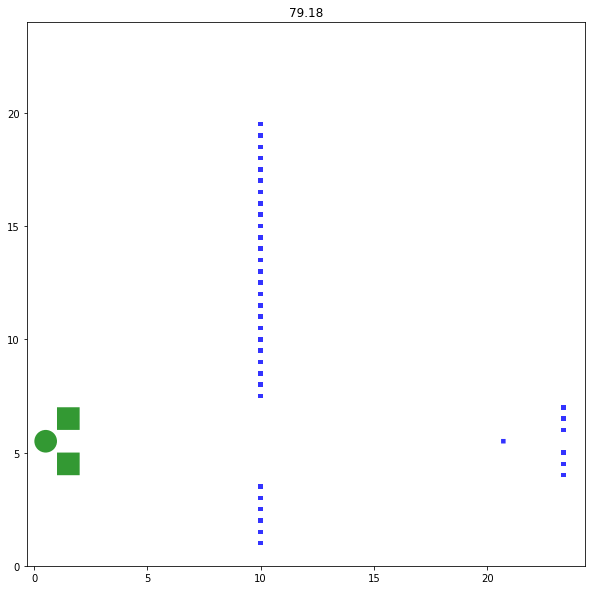

In [7]:
env=Environment(24,24)  # size of the environment
robot=Robot(env)

robot=build(robot)

# put a bunch of blocks
for y in arange(1,20,0.5):
    Box(env,10,y,width=0.2,height=0.2,density=0.01)

run_sim(env,act_forward_backward_example,
        total_time=80,  # seconds
        dt=1/60,
        dt_display=2,  # make this larger for a faster display
       )

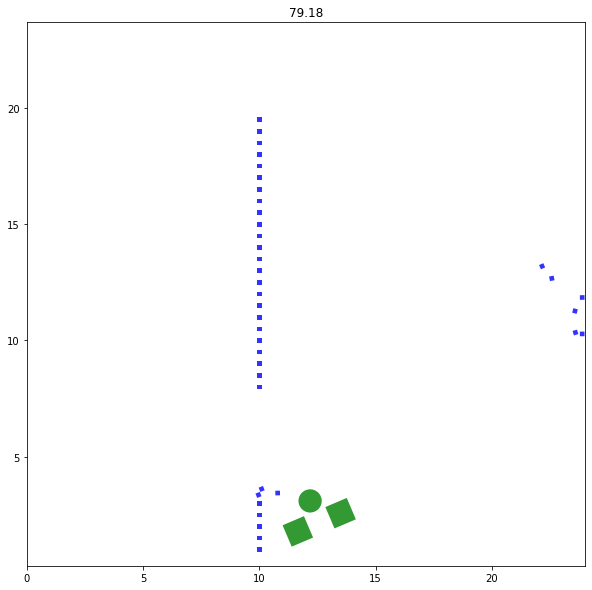

In [8]:
env=Environment(24,24)  # size of the environment
robot=Robot(env)

robot=build(robot)

# put a bunch of blocks
for y in arange(1,20,0.5):
    Box(env,10,y,width=0.2,height=0.2,density=0.01)

run_sim(env,act_forward_turn_example,
        total_time=80,  # seconds
        dt=1/60,
        dt_display=2,  # make this larger for a faster display
       )